<a href="https://colab.research.google.com/github/JamesLeeeeeee/machineLearning_practice/blob/master/20211125_pytorch_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1= nn.Conv2d(1,6,3)
    self.conv2= nn.Conv2d(6,16,3)
    self.fc1= nn.Linear(16*6*6, 120)
    self.fc2= nn.Linear(120, 84)
    self.fc3= nn.Linear(84,10)

  def forward(self,x):
    x= F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x= F.max_pool2d(F.relu(self.conv2(x)),2)
    x= x.view(-1, self.num_flat_features(x))
    x= F.relu(self.fc1(x)) 
    x= F.relu(self.fc2(x)) 
    x= self.fc3(x)
    return x

  def num_flat_features(self, x):
    size=x.size()[1:]
    num_features=1
    for s in size:
      num_features*=s
    return num_features
net=Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [6]:
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

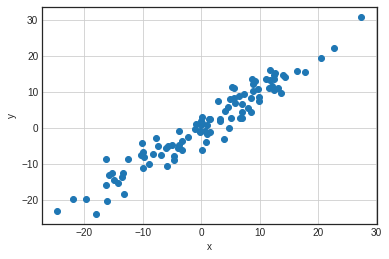

In [8]:
X= torch.randn(100,1)*10
y=X+3*torch.randn(100,1)
plt.plot(X.numpy(), y.numpy(),'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [11]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear= nn.Linear(1,1)

  def forward(self, x):
    pred= self.linear(x)
    return pred

In [12]:
torch.manual_seed(111)

model= LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [15]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.4311]], requires_grad=True), Parameter containing:
tensor([0.8280], requires_grad=True)]


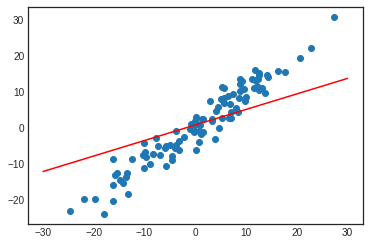

In [18]:
w, b= model.parameters()
def get_params():
  return w[0][0].item(), b[0].item()

def plot_fit(title):
  plt.title= title
  w1, b1= get_params()
  x1= np.array([-30, 30])
  y1=w1*x1+b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X,y)
  plt.show()

plot_fit('Initial Model')

In [21]:
criterion= nn.MSELoss()
optimizer= optim.SGD(model.parameters(), lr=0.001)

In [24]:
epochs=100
losses=[]
for epoch in range(epochs):
  optimizer.zero_grad()

  y_pred=model(X)
  loss= criterion(y_pred, y)
  losses.append(loss)
  loss.backward()

  optimizer.step()

  if epoch % 10 ==0:
    print('Epoch: {:3d}\tloss: {:.4f}'.format(epoch+1, loss))

Epoch:   1	loss: 8.7108
Epoch:  11	loss: 8.7034
Epoch:  21	loss: 8.6963
Epoch:  31	loss: 8.6895
Epoch:  41	loss: 8.6830
Epoch:  51	loss: 8.6767
Epoch:  61	loss: 8.6707
Epoch:  71	loss: 8.6649
Epoch:  81	loss: 8.6594
Epoch:  91	loss: 8.6540


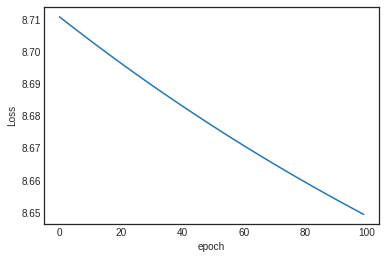

In [25]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

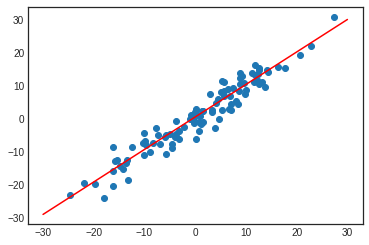

In [26]:
plot_fit('trained Model')

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [11]:
transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5,), (0.5, ))])

In [12]:
trainset= torchvision.datasets.MNIST(root='./data',
                                     train=True,
                                     download=True,
                                     transform=transform)
testset= torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     download=True,
                                     transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [13]:
train_loader= DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader=DataLoader(testset, batch_size=128, shuffle= False, num_workers=2)

In [14]:
image, label= next(iter(train_loader))

In [15]:
image.shape, label.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [16]:
def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  fig= plt.figure(figsize=(10,5))
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

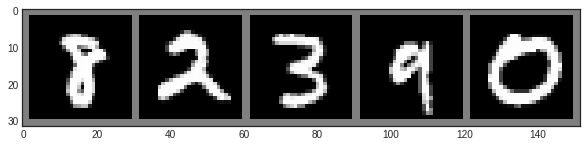

In [27]:
dataiter= iter(train_loader)
images, labels= dataiter.next()
imshow(torchvision.utils.make_grid(images[:5]))

In [32]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1= nn.Conv2d(1,6,3)
    self.conv2= nn.Conv2d(6,16,3)
    self.fc1= nn.Linear(16*5*5, 120)
    self.fc2= nn.Linear(120, 84)
    self.fc3= nn.Linear(84,10)

  def forward(self, x):
    x= F.max_pool2d(F.relu(self.conv1(x)),(2,2))
    x= F.max_pool2d(F.relu(self.conv2(x)),2)
    x= x.view(-1, self.num_flat_features(x))
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= self.fc3(x)
    return x
  
  def num_flat_features(self, x):
    size= x.size()[1:]
    num_features=1
    for s in size:
      num_features*=s

    return num_features

net=Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [33]:
params= list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [34]:
input= torch.randn(1,1,28,28)
out= net(input)
print(out)

tensor([[-0.0991, -0.0341, -0.0828,  0.0493,  0.1483, -0.0813,  0.1358, -0.0861,
         -0.0685, -0.0061]], grad_fn=<AddmmBackward0>)


In [35]:
criterion= nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [36]:
total_batch= len(train_loader)
print(total_batch)

469


In [39]:
for epoch in range(2):
  running_loss= 0.0
  for i , data in enumerate(train_loader, 0):
    inputs, labels= data

    optimizer.zero_grad()

    outputs= net(inputs)
    loss= criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss +=loss.item()
    if i % 100==99:
      print('Epoch: {}, Iter: {}, Loss: {}'.format( epoch+1, i+1, running_loss/2000))
      running_loss=0.0

Epoch: 1, Iter: 100, Loss: 0.11508330416679383
Epoch: 1, Iter: 200, Loss: 0.11481464087963104
Epoch: 1, Iter: 300, Loss: 0.11448647487163544
Epoch: 1, Iter: 400, Loss: 0.11392985308170318
Epoch: 2, Iter: 100, Loss: 0.11240714573860168
Epoch: 2, Iter: 200, Loss: 0.11012914359569549
Epoch: 2, Iter: 300, Loss: 0.10417168319225312
Epoch: 2, Iter: 400, Loss: 0.0863255313038826


In [41]:
path= './mnist_net.pth'
torch.save(net.state_dict(), path)

In [42]:
net=Net()
net.load_state_dict(torch.load(path))

<All keys matched successfully>

In [43]:
net.parameters

<bound method Module.parameters of Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

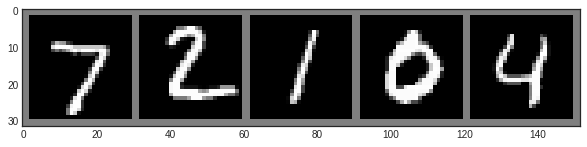

In [45]:
dataiter= iter(test_loader)
images, labels= dataiter.next()

imshow(torchvision.utils.make_grid(images[:5]))

In [46]:
outputs= net(images)

In [51]:
_,predicted=torch.max(outputs, 1)
print(predicted)

tensor([7, 2, 1, 0, 4, 1, 9, 9, 6, 9, 0, 6, 9, 0, 1, 3, 4, 7, 3, 4, 7, 6, 6, 8,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 9, 6, 3, 3, 1, 6,
        4, 4, 6, 5, 5, 5, 6, 5, 4, 1, 4, 7, 7, 8, 9, 3, 9, 1, 2, 4, 3, 0, 7, 0,
        2, 8, 1, 9, 3, 7, 1, 7, 7, 6, 2, 7, 4, 4, 7, 3, 6, 1, 3, 6, 1, 3, 1, 4,
        1, 9, 6, 9, 6, 0, 7, 4, 4, 4, 2, 1, 9, 4, 8, 1, 1, 9, 9, 4, 4, 4, 9, 0,
        5, 4, 7, 6, 9, 9, 0, 5])


In [54]:
print(''.join('{}\t'.format(str(predicted[j].numpy())) for j in range(5)))

7	2	1	0	4	


In [58]:
correct= 0
total= 0

with torch.no_grad():
  for data in test_loader:
    images, labels= data
    outputs= net(images)
    _, predicted= torch.max(outputs.data, 1)
    total+= labels.size(0)
    correct+= (predicted== labels).sum().item()
print(correct)
print(100 *correct/total)

7432
74.32


In [3]:
torch.cuda.is_available()

True

In [4]:
use_cuda=torch.cuda.is_available()
device= torch.device('cuda' if use_cuda else 'cpu')

In [5]:
device

device(type='cuda')

In [6]:
transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5,), (0.5, ))])

In [7]:
trainset= torchvision.datasets.MNIST(root='./data',
                                     train=True,
                                     download=True,
                                     transform=transform)
testset= torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     download=True,
                                     transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [8]:
train_loader= DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader=DataLoader(testset, batch_size=128, shuffle= False, num_workers=2)

In [9]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1= nn.Conv2d(1,6,3)
    self.conv2= nn.Conv2d(6,16,3)
    self.fc1= nn.Linear(16*5*5, 120)
    self.fc2= nn.Linear(120, 84)
    self.fc3= nn.Linear(84,10)

  def forward(self, x):
    x= F.max_pool2d(F.relu(self.conv1(x)),(2,2))
    x= F.max_pool2d(F.relu(self.conv2(x)),2)
    x= x.view(-1, self.num_flat_features(x))
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= self.fc3(x)
    return x
  
  def num_flat_features(self, x):
    size= x.size()[1:]
    num_features=1
    for s in size:
      num_features*=s

    return num_features

net=Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [10]:
net=Net().to(device)

In [11]:
criterion= nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [15]:
for epoch in range(2):
  running_loss= 0.0
  for i , data in enumerate(train_loader, 0):
    inputs, labels= data[0].to(device), data[1].to(device)
    optimizer.zero_grad()

    outputs= net(inputs)
    loss= criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss +=loss.item()
    if i % 100==99:
      print('Epoch: {}, Iter: {}, Loss: {}'.format( epoch+1, i+1, running_loss/100))
      running_loss=0.0

Epoch: 1, Iter: 100, Loss: 0.5278763401508332
Epoch: 1, Iter: 200, Loss: 0.4817663514614105
Epoch: 1, Iter: 300, Loss: 0.42463059470057485
Epoch: 1, Iter: 400, Loss: 0.3992700520157814
Epoch: 2, Iter: 100, Loss: 0.3290438862144947
Epoch: 2, Iter: 200, Loss: 0.33216129913926123
Epoch: 2, Iter: 300, Loss: 0.29216972932219504
Epoch: 2, Iter: 400, Loss: 0.2681968618929386


In [16]:
correct= 0
total= 0

with torch.no_grad():
  for data in test_loader:
    images, labels= data[0].to(device), data[1].to(device)
    outputs= net(images)
    _, predicted= torch.max(outputs.data, 1)
    total+= labels.size(0)
    correct+= (predicted== labels).sum().item()
print(correct)
print(100 *correct/total)

9321
93.21
